In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from typing import Optional
from itertools import product
import matplotlib.dates as mdates
import datetime

from utils import SECTORS, DR_PRICES, NG_PRICES, NAT_GAS_NICE_NAMES, get_datapoint

In [17]:
# User defined variables
METHOD = "static" # "static" | "dynamic"
REGION = "caiso" # "caiso" | "new_england"

In [18]:
# Path handling (DO NOT CHANGE)
FIGURES_BASE = Path("..","figures","seasons")
FIGURES_METHOD = Path(FIGURES_BASE, METHOD)

In [19]:
def get_season(season_type: str, ng_price: str, sector: Optional[str] = None, dr_price: Optional[str] = None) -> dict[str, datetime.date]:
    
    if season_type == "shed":
        df = get_datapoint(region=REGION, method=METHOD, ng_price=ng_price, sector=sector, dr_price=dr_price, result="shed_season")
    elif season_type == "shift":
        df = get_datapoint(region=REGION, method=METHOD, ng_price=ng_price, sector=sector, dr_price=dr_price, result="shift_season")
    else:
        raise ValueError(f"Expected one of ['shift', 'shed']. Recieved {season_type}")
        
    df["value"] = pd.to_datetime(df.value)
    
    return {
        "start": df.at["first_day", "value"].date(),
        "end": df.at["last_day", "value"].date()
    }

In [20]:
def get_data(season_type: str) -> dict[str,dict[str, str | datetime.date]]:
    """
    data = get_data()
    data[emission][price][sector]
    > {start: datetime.date, end: datetime.date}
    """
    
    data = {}
    
    for ng, s, dr in product(NG_PRICES, SECTORS, DR_PRICES):

        if ng not in data:
            data[ng] = {}
            data[ng][s] = {}
            data[ng][s][dr] = {}
        else: 
            if s not in data[ng]:
                data[ng][s] = {}
                data[ng][s][dr] = {}
            else:
                if dr not in data[ng][s]:
                    data[ng][s][dr] = {}
                    
        season = get_season(season_type, ng, s, dr)

        data[ng][s][dr]["start"] = season["start"]
        data[ng][s][dr]["end"] = season["end"]
        
    return data

In [21]:
def plot_season(ng_price: str, season_type: str, include_title: bool = False) -> tuple[plt.figure, plt.axes]:
    
    data = get_data(season_type)
    
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    
    year_start = pd.Timestamp("2030-01-01")
    year_end = pd.Timestamp("2030-12-31")
    # dates = pd.date_range(start=year_start, end=year_end, freq="D")
    
    y_labels = []
    for i, (s, dr) in enumerate(product(SECTORS, DR_PRICES)):
        scenario = data[ng_price][s][dr]
        label = f"{s}-{dr}"
        ax.fill_betweenx(
            [i + 1 - 0.2, i + 1 + 0.2], 
            scenario["start"], scenario["end"], 
            color="tab:blue", alpha=0.75
        )
        # axs[ax].text(scenario["end"] + pd.Timedelta(days=3), i + 1, label, va="center")
        y_labels.append(label)

    if include_title:
        ax.set_title(NAT_GAS_NICE_NAMES[ng_price])

    ax.set_yticks(range(1, i + 2))
    ax.set_yticklabels(y_labels)
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.set_xlim([year_start, year_end])

    ax.grid(axis="x", linestyle="--", alpha=0.6)
    
    plt.tight_layout(rect=[0, 0, 1, 0.99]) 
    
    return fig, ax

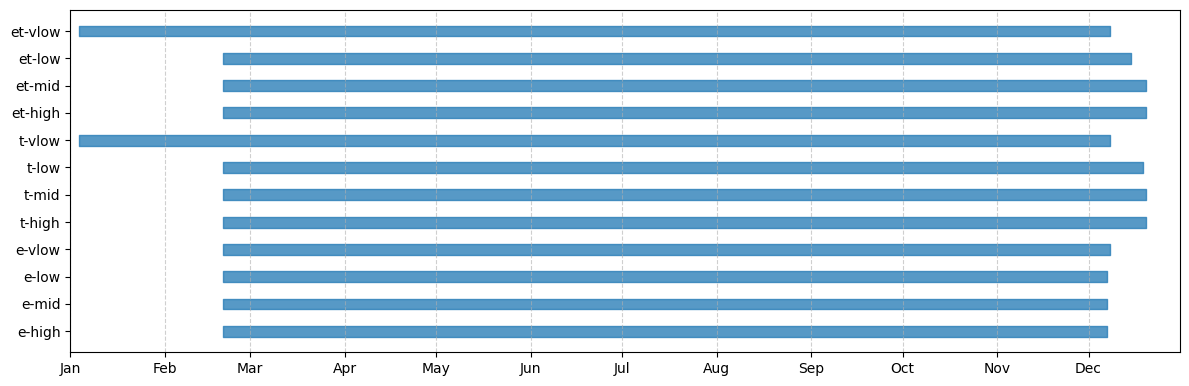

In [22]:
fig, _ = plot_season("lgas", "shed", include_title=False)
# fig.savefig(Path(FIGURES, "shed_lgas.png"), bbox_inches="tight")

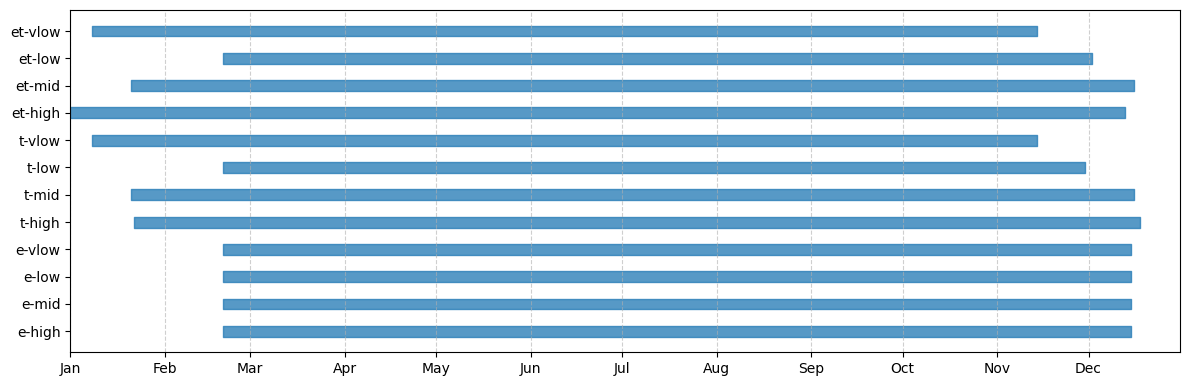

In [23]:
fig, _ = plot_season("mgas", "shed", include_title=False)
# fig.savefig(Path(FIGURES, "mgas.png"), bbox_inches="tight")

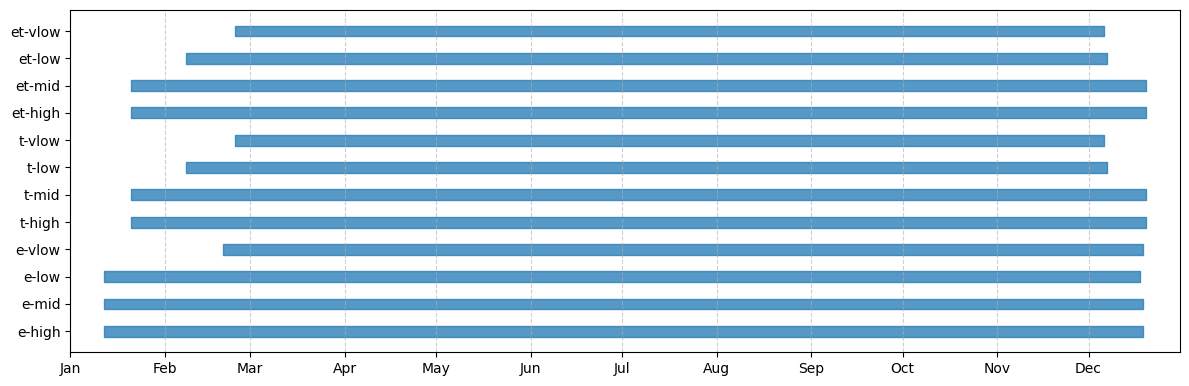

In [24]:
fig, _ = plot_season("hgas", "shed", include_title=False)
# fig.savefig(Path(FIGURES, "shed_hgas.png"), bbox_inches="tight")

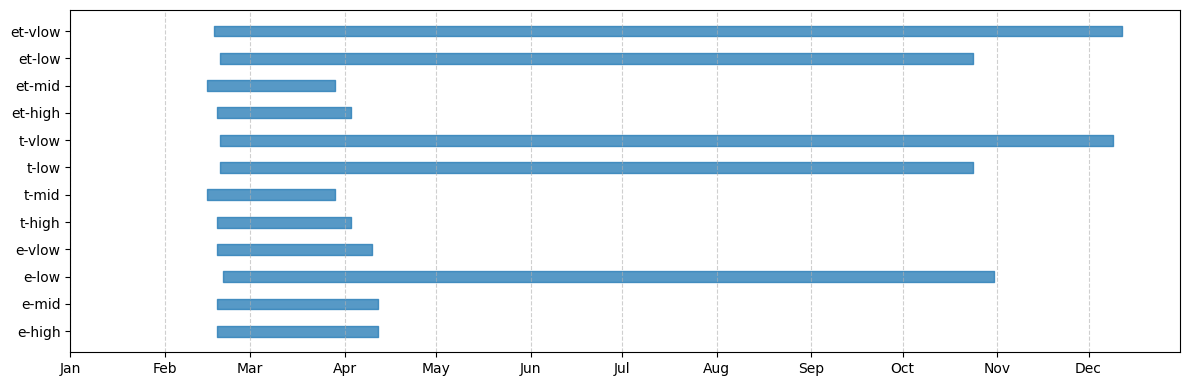

In [25]:
fig, _ = plot_season("lgas", "shift", include_title=False)
# fig.savefig(Path(FIGURES, "shift_lgas.png"), bbox_inches="tight")

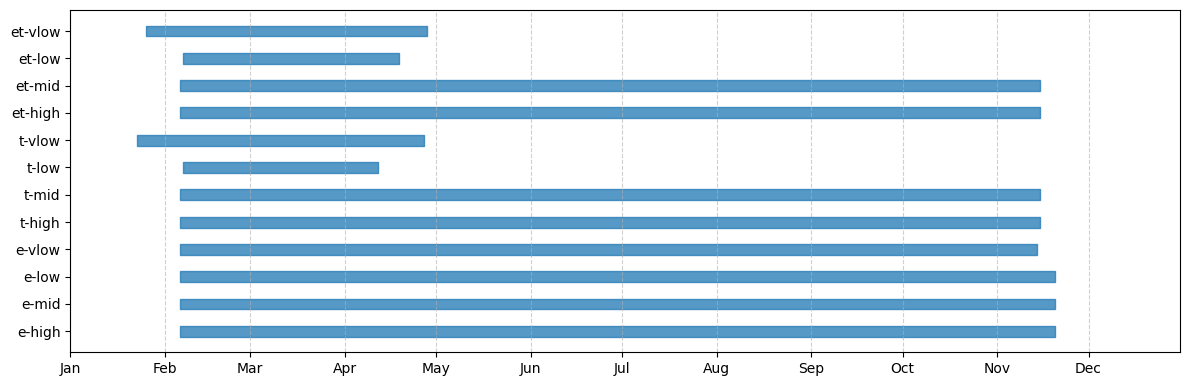

In [26]:
fig, _ = plot_season("mgas", "shift", include_title=False)
# fig.savefig(Path(FIGURES, "shift_mgas.png"), bbox_inches="tight")

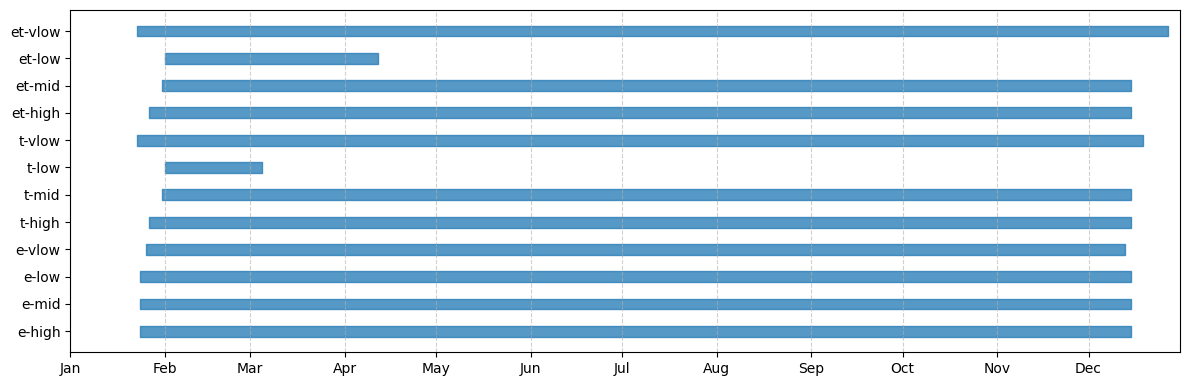

In [27]:
fig, _ = plot_season("hgas", "shift", include_title=False)
# fig.savefig(Path(FIGURES, "shift_hgas.png"), bbox_inches="tight")